In [12]:
import os
import sys
base_dir = os.path.join("/home/jovyan/work/Corona/COVID-19")
sys.path.append(base_dir)
import model as md

In [13]:
merger = md.Merger(data_dir="data", load_from_raw=False, load_from_agg=True)

# Prediction with LinearRegression on logistic numbers

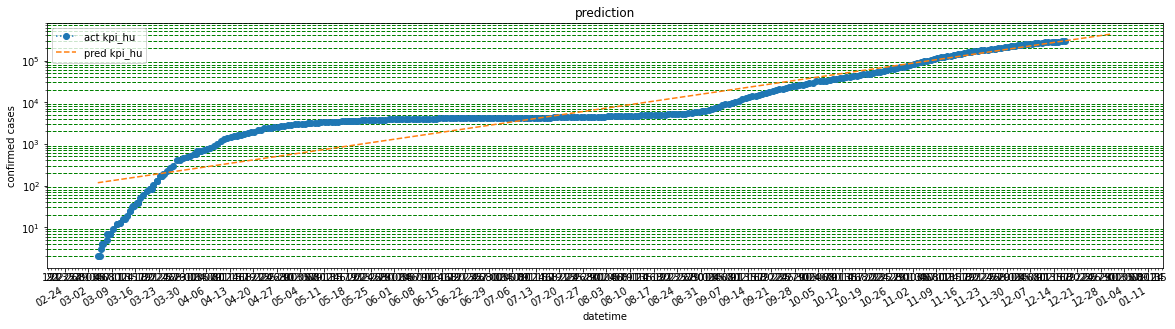

Coefficient of determination: {'kpi_hu': 0.8295931638041764}
Evolution factor per day: {'kpi_hu': 1.1}
Doubling in day(s): {'kpi_hu': 1.8181818181818181}


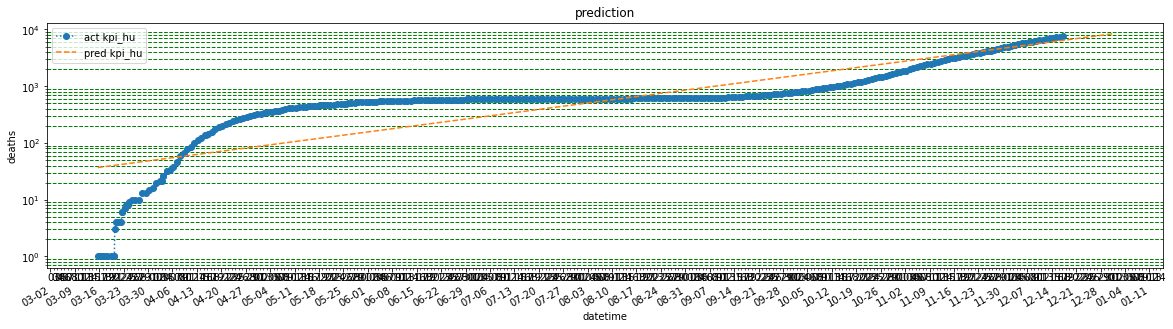

Coefficient of determination: {'kpi_hu': 0.6817955655295682}
Evolution factor per day: {'kpi_hu': 1.0}
Doubling in day(s): {'kpi_hu': 2.0}


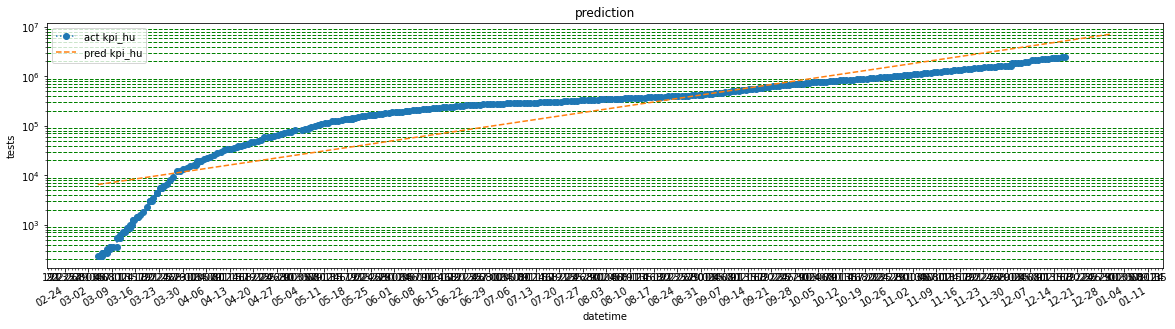

Coefficient of determination: {'kpi_hu': 0.7779954409761644}
Evolution factor per day: {'kpi_hu': 1.1}
Doubling in day(s): {'kpi_hu': 1.8181818181818181}


In [14]:
tmpDf = md.DataProcessing.Analyse.start_analyse(merger.show_kpi_hu(),["kpi_hu"],"confirmed cases", "infected")
tmpDf = md.DataProcessing.Analyse.start_analyse(merger.show_kpi_hu(),["kpi_hu"],"deaths", "deaths")
tmpDf = md.DataProcessing.Analyse.start_analyse(merger.show_kpi_hu(),["kpi_hu"],"tests", "tests")
#md.DataProcessing.Analyse.start_analyse(merger.show_kpi_hu(),["kpi_hu"],"recovered cases", "recovered")

In [15]:
from IPython.display import Math
Math(r'log(y) = a*x+b\\ \
     log(y_{2}) - log(y_{1}) = a*(x_{2}-x_{1})\\ \
     10^{log(y_{2}) - log(y_{1})} = 10^{a*(x_{2}-x_{1})}\\ \
     10^{log(y_{2})} / 10^{log(y_{1})} = 10^{a*(x_{2}-x_{1})}\\ \
     y_{2} / y_{1} = 10^{a*(x_{2}-x_{1})}')

<IPython.core.display.Math object>

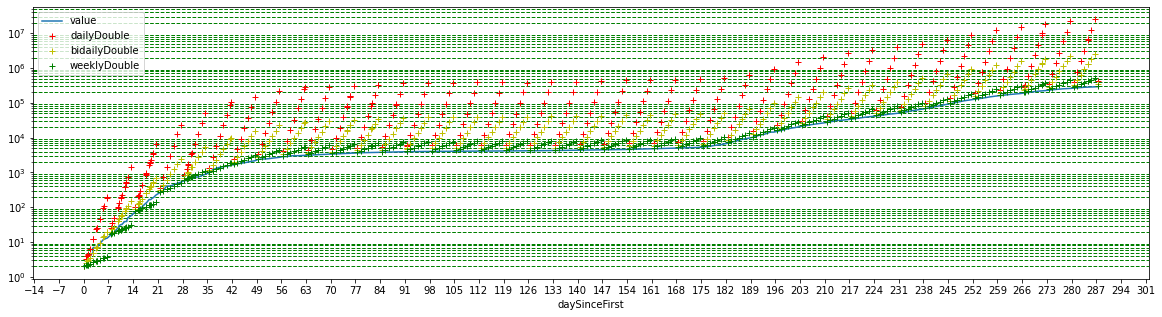

In [16]:
df = merger.show_kpi_hu()[["update","infected"]].copy()
#df = myProcessing.df["HU"][["update","deaths"]].copy()
df.columns = ["date","value"]

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def createDf(df, dayPerPeriod=5):
    # columns ["date","value"]
    df = df[df["value"]>0].copy()
    df["dayInt"] = df["date"].astype(int)/(10**9)/3600/24
    df["cycle"] = df["dayInt"].apply(lambda cell: int((cell - df["dayInt"].min()) / dayPerPeriod))
    df["dayStartOfCycle"] = df["dayInt"].apply(lambda cell: (cell - df["dayInt"].min()) % dayPerPeriod)
    df["valueStartOfCycle"] = df.apply(lambda row: df[df["cycle"]==row["cycle"]]["value"].min(), axis=1)
    df["daySinceFirst"] = df["dayInt"] - df["dayInt"].min()
    df["dailyDouble"] = df["valueStartOfCycle"] * (2**df["dayStartOfCycle"])
    df["bidailyDouble"] = df["valueStartOfCycle"] * (2**(df["dayStartOfCycle"] / 2))
    df["weeklyDouble"] = df["valueStartOfCycle"] * (2**(df["dayStartOfCycle"] / 7))
    del df["date"]
    del df["dayInt"]
    del df["dayStartOfCycle"]
    del df["valueStartOfCycle"]
    del df["cycle"]
    return df
def plotDf(df, dayPerPeriod=5):
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.set_yscale("log")
    ax.grid(True, which="minor", axis="y", color='g', linestyle='--', linewidth=1)
    ax.grid(True, which="major", axis="y", color='g', linestyle='-', linewidth=2)
    ax.xaxis.set_major_locator(MultipleLocator(period))
    df.plot(x="daySinceFirst", y="value", ax=ax)
    df.plot(x="daySinceFirst", y="dailyDouble", ax=ax, style="r+")
    df.plot(x="daySinceFirst", y="bidailyDouble", ax=ax, style="y+")
    df.plot(x="daySinceFirst", y="weeklyDouble", ax=ax, style="g+")
    plt.show()
    
period = 7
df = createDf(df, dayPerPeriod=period)
plotDf(df, dayPerPeriod=period)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
deaths_df = pd.read_json("data/deaths_hu/latest.json")
deaths_df["Nem"] = deaths_df["Nem"].apply(lambda cell: cell[0:1].capitalize() if isinstance(cell, str) else cell)
deaths_df["Korosztaly"] = deaths_df["Kor"] - deaths_df["Kor"] % 10
deaths_df.tail()
deaths_df[deaths_df["Kor"]<50]

,Sorszám,Nem,Kor,Alapbetegségek,Korosztaly
33,7505.0,N,48.0,adat feltöltés alatt,40.0
74,7465.0,F,39.0,"veseelégtelenség, magasvérnyomás betegség",30.0
131,7409.0,F,34.0,"tüdõgyulladás, magasvérnyomás-betegség, vérmér...",30.0
205,7337.0,F,41.0,akut hasnyálmirigy-gyulladás,40.0
210,7332.0,F,25.0,"cukorbetegség, Down-szindróma",20.0
...,...,...,...,...,...
7580,106.0,F,46.0,"krónikus veseelégtelenség, szívelégtelenség, p...",40.0
7626,61.0,N,48.0,"krónikus veseelégtelenség, anyagcsere betegség...",40.0
7634,53.0,F,49.0,"magas vérnyomás, anyagcsere betegség",40.0
7681,7.0,F,38.0,"krónikus pancreatitis, alkoholos májkárosodás",30.0


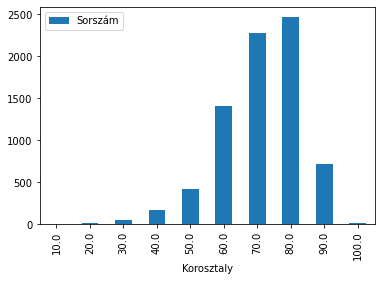

In [18]:
deaths_df.groupby(["Korosztaly"]).agg({"Sorszám":"count"}).plot(kind="bar")
plt.show()

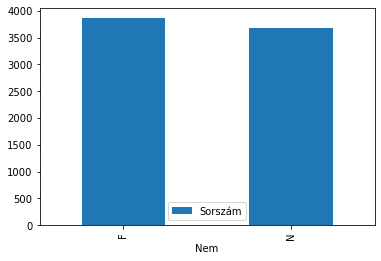

In [19]:
deaths_df.groupby(["Nem"]).agg({"Sorszám":"count"}).plot(kind="bar")
plt.show()

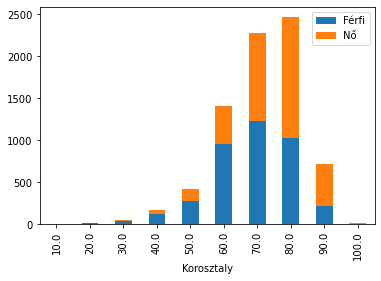

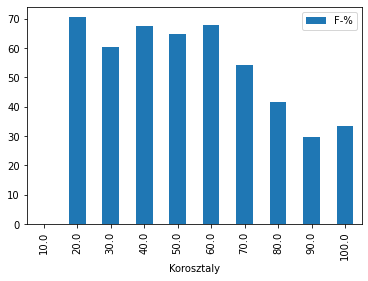

In [20]:
stats_df = deaths_df[deaths_df["Nem"]!=""].groupby(["Korosztaly","Nem"]).agg({"Sorszám":"count"}).unstack('Nem')
columns = ["Férfi","Nő"]
stats_df.columns = columns
stats_df["F-%"] = stats_df["Férfi"]/(stats_df["Férfi"]+stats_df["Nő"])*100
stats_df[columns].plot(kind="bar", stacked=True)
stats_df[["F-%"]].plot(kind="bar")
plt.show()

In [21]:
SIR = merger.show_kpi_hu()[["update","deaths","infected","recovered"]].copy()
SIR.columns = ["date","Deaths","Confirmed","Recovered"]
SIR["I"] = SIR["Confirmed"]-SIR["Deaths"]-SIR["Recovered"]
SIR["RD"] = SIR["Deaths"]+SIR["Recovered"]
SIR["D"] = SIR["Deaths"]
SIR.tail()

,date,Deaths,Confirmed,Recovered,I,RD,D
2020-12-14 08:57:00,2020-12-14 08:57:00,7130.0,283870.0,82546.0,194194.0,89676.0,7130.0
2020-12-14 11:23:00,2020-12-14 11:23:00,7130.0,283870.0,82546.0,194194.0,89676.0,7130.0
2020-12-15 08:50:00,2020-12-15 08:50:00,7237.0,285763.0,83115.0,195411.0,90352.0,7237.0
2020-12-16 08:42:00,2020-12-16 08:42:00,7381.0,288567.0,83940.0,197246.0,91321.0,7381.0
2020-12-17 09:07:00,2020-12-17 09:07:00,7538.0,291549.0,86954.0,197057.0,94492.0,7538.0


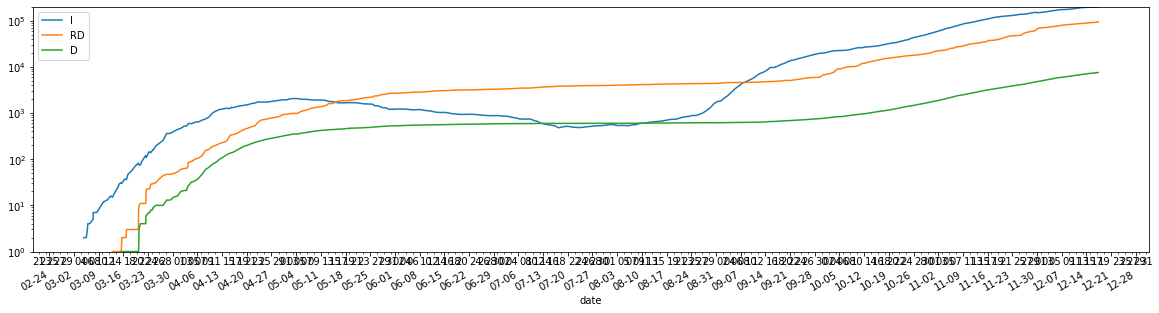

In [22]:
import matplotlib.dates as dates
fig, ax = plt.subplots(figsize=(20,5))

ax.xaxis.set_minor_locator(dates.DayLocator(bymonthday=range(1,32), interval=2))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('\n%m-%d'))
ax.set_yscale("log")
ax.set_ylim(1, 200000)

SIR.plot(x="date",y=["I","RD","D"],ax=ax)
plt.show()